# HACI-Fälle und Großwetterlagen



In [1]:
import pandas as pd
import numpy as np

from standard_config import *

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

/vols/satellite/home/lenk/anaconda3/envs/tracking/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
haci_cases = pd.read_csv("{}/HACI_bbox_data/HACI_2008-2017-bbox-filtered.csv".format(local_data_path))
gwl = pd.read_csv("/vols/satellite/home/lenk/data/GWL_WLK_1979-2019.csv",keep_default_na=False)

In [35]:
dates = haci_cases.date.unique()

In [36]:
gwl.GWL.unique()

array(['HB', 'WZ', 'HNZ', 'NWA', 'WA', 'HNA', 'TRW', 'HM', 'HFA', 'HFZ',
       'BM', 'NEZ', 'SEZ', 'SA', 'SZ', 'WW', 'TRM', 'NZ', 'SEA', 'TB',
       'WS', 'SWA', 'NWZ', 'U', 'TM', 'HNFA', 'NEA', 'NA', 'HNFZ', 'SWZ'],
      dtype=object)

In [37]:
gwl.groupby("GWL").count()

,date,WLK,GT,ZF
GWL,,,,
BM,1692,1692,1692,1692
HB,455,455,455,455
HFA,386,386,386,386
HFZ,234,234,234,234
HM,805,805,805,805
HNA,268,268,268,268
HNFA,211,211,211,211
HNFZ,246,246,246,246
HNZ,289,289,289,289


In [38]:
gwl_date_collection = []
gwl_count = []

for d in dates:
    haci_subset = haci_cases[haci_cases.date==d]
    
    dd = int(d.replace("-",""))
    
    date_gwl = gwl[gwl.date==int(dd)].GWL.values[0]
    
    gwl_date_collection.append(date_gwl)
    
    gwl_count.extend([date_gwl]*len(haci_subset.dt))

In [39]:
gwl_date_collection = np.array(gwl_date_collection)

In [40]:
date_gwl, date_gwl_count = np.unique(gwl_date_collection,return_counts=True)

In [41]:
gwl_count = np.array(gwl_count)
case_gwl, case_gwl_count = np.unique(gwl_count,return_counts=True)

In [49]:
case_gwl_count / np.sum(case_gwl_count)

array([0.0645811 , 0.0121483 , 0.01730975, 0.04229873, 0.02045698,
       0.01409958, 0.00704979, 0.07043495, 0.05772015, 0.00270662,
       0.00434317, 0.01630264, 0.01529552, 0.01454019, 0.00591679,
       0.00755335, 0.00446906, 0.01189652, 0.01491786, 0.08434569,
       0.02253415, 0.05211808, 0.04443885, 0.08736703, 0.0958016 ,
       0.00780512, 0.05488764, 0.01114118, 0.02014225, 0.11537735])

In [43]:
case_gwl

array(['BM', 'HB', 'HFA', 'HFZ', 'HM', 'HNA', 'HNFA', 'HNFZ', 'HNZ', 'NA',
       'NEA', 'NEZ', 'NWA', 'NWZ', 'NZ', 'SA', 'SEA', 'SEZ', 'SWA', 'SWZ',
       'SZ', 'TB', 'TM', 'TRM', 'TRW', 'U', 'WA', 'WS', 'WW', 'WZ'],
      dtype='<U4')

In [50]:
date_gwl_count / np.sum(date_gwl_count)

array([0.07645875, 0.01509054, 0.02112676, 0.02112676, 0.03219316,
       0.01458753, 0.0055332 , 0.03571429, 0.03672032, 0.00603622,
       0.00955734, 0.01509054, 0.01961771, 0.03470825, 0.01408451,
       0.01559356, 0.00855131, 0.00754527, 0.01861167, 0.08199195,
       0.01760563, 0.03269618, 0.02967807, 0.10060362, 0.08953722,
       0.00804829, 0.06187123, 0.01609658, 0.01961771, 0.13430584])

In [53]:
gwl_count_ratio = case_gwl_count / np.sum(date_gwl_count)

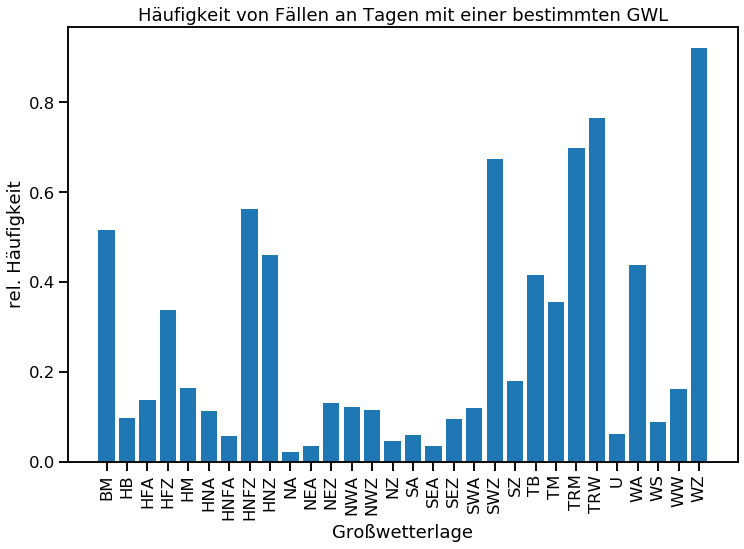

In [56]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.bar(case_gwl,gwl_count_ratio)
plt.xticks(rotation=90)
ax.set_title("Häufigkeit von Fällen an Tagen mit einer bestimmten GWL")
ax.set_xlabel("Großwetterlage")
ax.set_ylabel("rel. Häufigkeit")
plt.savefig("/vols/satellite/home/lenk/proj/2020-05_EMF-Vortrag/fall_gwl.pdf")